In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.production_budget=df.production_budget.apply(lambda x: x.strip('$'))
df.production_budget=df.production_budget.replace({",":''}, regex=True).apply(pd.to_numeric)
df.domestic_gross=df.domestic_gross.apply(lambda x: x.strip('$'))
df.domestic_gross=df.domestic_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df.worldwide_gross=df.worldwide_gross.apply(lambda x: x.strip('$'))
df.worldwide_gross=df.worldwide_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df['domestic_profit']=df.domestic_gross-df.production_budget
df['worldwide_profit']=df.worldwide_gross-df.production_budget
df.release_date=pd.to_datetime(df.release_date)
df['release_year'] = df['release_date'].dt.to_period('Y')


In [106]:
bydates=df.sort_values(by = 'release_date')
low_cutoff=pd.to_datetime('06/06/2000')
high_cutoff=pd.to_datetime('06/06/2019')
bydate_temp=bydates.loc[(bydates.release_date >low_cutoff)&(bydates.release_date<high_cutoff)]
bydate=bydate_temp
# .loc[bydates.domestic_gross!=0]

In [107]:
df2=bydate.groupby('release_year')

In [108]:
bydate['profit_margin']=bydate.worldwide_profit/bydate.production_budget

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


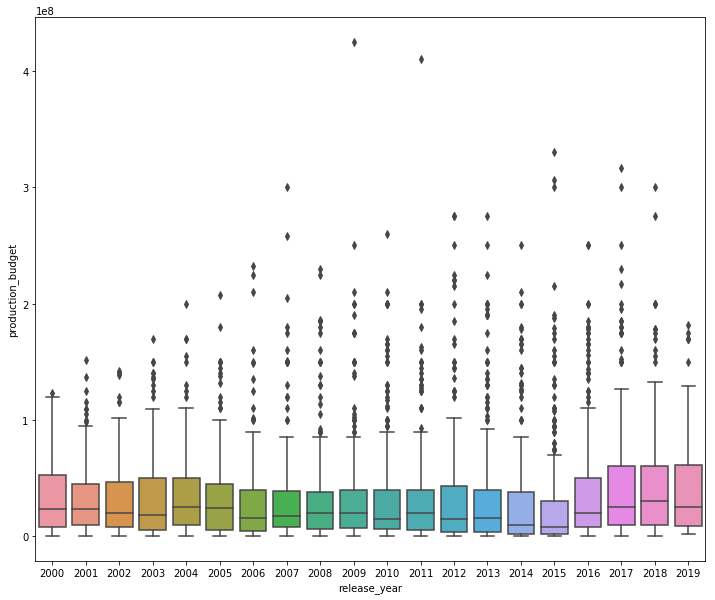

In [110]:
plt.figure(figsize=(12,10))
plot1 = sns.boxplot(x="release_year", y="production_budget", data=bydate)

In [98]:
by_pm_temp=bydate.sort_values(by='profit_margin')

In [99]:
by_pm_temp.tail(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_year,profit_margin
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,62627092,2014,54.458341
4249,50,2017-01-20,Split,5000000,138141585,278964806,133141585,273964806,2017,54.792961
4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,2010,58.170677
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,2015,63.364198
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,2011,65.580591
5428,29,2008-09-26,Fireproof,500000,33456317,33473297,32956317,32973297,2008,65.946594
5459,60,2009-04-23,Home,500000,15433,44793168,-484567,44293168,2009,88.586336
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,100759490,2012,100.759490
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,41556474,2015,415.564740
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,107468810,193733034,2009,430.517853


In [100]:
by_pm=by_pm_temp.drop([5679,5492,5211,5459])
by_pm.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_year,profit_margin
5217,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,17119640,41411721,2012,41.411721
5063,64,2016-10-21,Moonlight,1500000,27854931,65245512,26354931,63745512,2016,42.497008
3517,18,2012-05-25,Les Intouchables,10800000,13182281,484873045,2382281,474073045,2012,43.895652
4248,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,2017,50.073590
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,62627092,2014,54.458341
4249,50,2017-01-20,Split,5000000,138141585,278964806,133141585,273964806,2017,54.792961
4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,2010,58.170677
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,2015,63.364198
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,2011,65.580591
5428,29,2008-09-26,Fireproof,500000,33456317,33473297,32956317,32973297,2008,65.946594


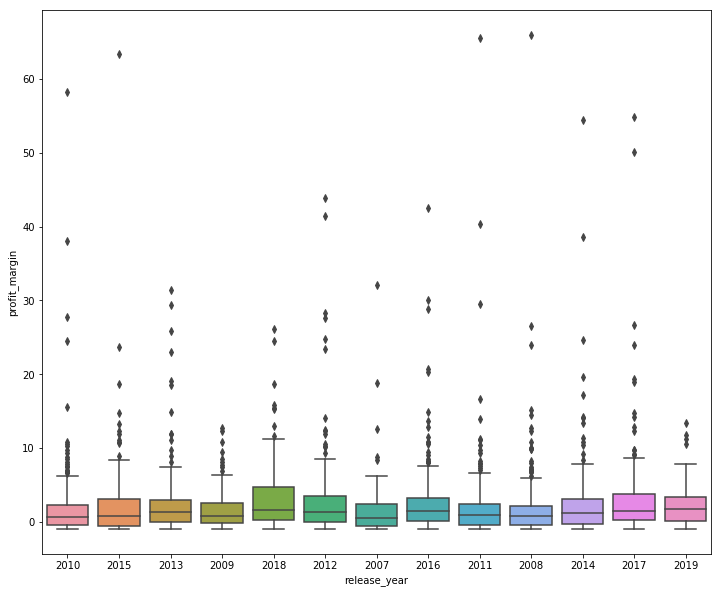

In [111]:
plt.figure(figsize=(12,10))
plot2 = sns.boxplot(x="release_year", y="profit_margin", data=by_pm)

In [ ]:
pd.concat([by_pm[['release_year','domestic_profit','region']],by_pm[['release_year','foreign_profit','region']]

In [116]:
by_pm['prop_int']=by_pm.domestic_gross/by_pm.worldwide_gross

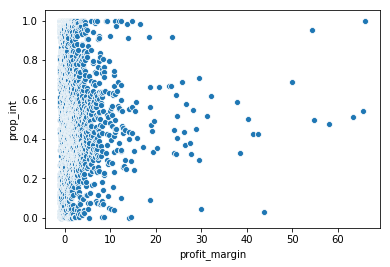

In [117]:
plot3=sns.scatterplot(x='profit_margin', y='prop_int', data=by_pm)
#doesn't look like correlation